In [1]:
from paper_plots import plot_hp_convergence
import numpy as np
from domains import Waveguide, ScattererShape, ScattererType
from FEM_solution import FEM_solution


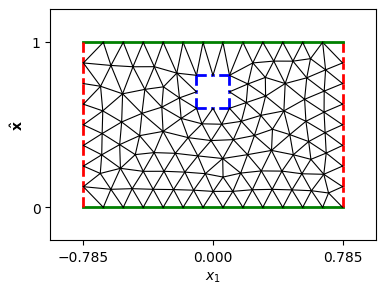

In [2]:
kappa_e = 8.
lambda_e = 2*np.pi/kappa_e
R = lambda_e
H = 1.

c = (0,0.7*H)
Domain = Waveguide(R=R,H=H)

rad = 0.1*H


scatterer_shape = ScattererShape.RECTANGLE
scatterer_type = ScattererType.SOUND_SOFT

#Domain.add_scatterer( ScattererShape.CIRCLE, ScattererType.SOUND_SOFT, (c, rad))
Domain.add_scatterer( scatterer_shape=scatterer_shape, scatterer_type=scatterer_type, params=(c, 2*rad, 2*rad))

Domain.generate_mesh(h_max=H/8)
Domain.plot_mesh()

In [3]:
Ny = 50
Nx = 10*Ny
x = np.linspace(-R,R,Nx)
y = np.linspace(0,H,Ny)
X, Y = np.meshgrid(x,y)
t = 0
kappa_e = 8.0
N = 2
kappa_i = np.sqrt(N)*kappa_e

Z = FEM_solution( R=R, H=H, params={"c":c, "height" : 2*rad, "width" : 2*rad}, scatterer_shape=scatterer_shape, scatterer_type=scatterer_type, 
                 n=t,k_e=kappa_e,k_i=kappa_i, X=X, Y=Y)

NDOF: 28540


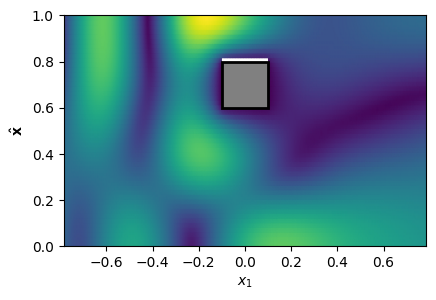

In [4]:
Domain.plot_field(X, Y, np.abs(Z))